### 1. Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#reading the data

df=pd.read_csv(r"C:\Users\Saptorshi Mondal\Downloads\project 3\project 3\fifa.csv")

In [3]:
df.shape  #there are 25,490 records and 60 columns/variables .

(25490, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Photo                     25490 non-null  object 
 4   Nationality               25490 non-null  object 
 5   Flag                      25490 non-null  object 
 6   Overall                   25490 non-null  int64  
 7   Potential                 25490 non-null  int64  
 8   Club                      25159 non-null  object 
 9   Club Logo                 25490 non-null  object 
 10  Value                     25490 non-null  object 
 11  Wage                      25490 non-null  object 
 12  Preferred Foot            25425 non-null  object 
 13  International Reputation  25425 non-null  float64
 14  Weak F

In [5]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,25490.000000,25490.000000,25490.000000,25490.000000,25425.000000,25425.000000,25425.000000,25401.000000,25425.000000,25425.000000,...,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000,25425.000000
mean,214357.925343,25.114162,66.261593,71.338486,1.109302,2.949656,2.368181,19.576788,49.881180,45.662694,...,48.663559,58.749853,47.438033,47.816087,45.730305,16.568220,16.349066,16.230718,16.342852,16.665998
std,29878.130401,4.649341,6.843978,6.112496,0.385040,0.661157,0.758538,15.988779,18.356056,19.447835,...,15.683216,11.387027,19.768914,21.578577,21.181263,17.655976,16.848998,16.516029,16.982910,17.940949
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200353.750000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,9.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221816.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,50.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236545.000000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,94.000000,...,90.000000,95.000000,94.000000,93.000000,91.000000,90.000000,92.000000,88.000000,90.000000,94.000000


In [6]:
df['ID'] = df['ID'].astype('object')

In [7]:
df['International Reputation'] = df['International Reputation'].astype('object')   
#because its a encoded data so we treated it as a object

In [8]:
df.describe(include = 'object')

,ID,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
count,25490,25490,25490,25490,25490,25159,25490,25490,25490,25425,25425.0,25425,25425,25401,23319,1775,25094,25425,25425,23308
unique,13657,13053,13657,160,160,651,678,204,140,2,5.0,9,9,27,1559,308,34,21,56,1163
top,237679,R. Williams,https://cdn.sofifa.org/players/4/19/237679.png,England,https://cdn.sofifa.org/flags/14.png,Empoli,https://cdn.sofifa.org/teams/2/light/1746.png,€1.1M,€1K,Right,1.0,Medium/ Medium,Normal,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,€1.1M
freq,8,13,8,2332,2332,64,64,621,6805,19454,23205.0,13687,14870,2882,2169,34,6825,3940,2064,785


### 2. Drop any columns that you deem unnecessary for analysis.

In [9]:
df.drop(columns = ['Photo','Flag','Club Logo'],inplace = True)


In [10]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,€220K,€1K,Right,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,€925K,€16K,Right,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,€5M,€46K,Right,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,€3.8M,€6K,Right,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,€120K,€1K,Right,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


In [11]:
#The columns Photo ,Flag,Club Logo are unnecessary data so we dropped it.

### 3. The following columns need to be converted for further analysis:

In [12]:
df['Value'] = df['Value'].apply(lambda x: x.replace('M','').replace('K','').replace('€','')).astype(float)

In [13]:
df['Value'].dtypes

dtype('float64')

In [14]:
df[['Value']].head()

,Value
0,220.0
1,925.0
2,5.0
3,3.8
4,120.0


In [15]:
df['Wage'] = df['Wage'].apply(lambda x: x.replace('M','').replace('K','').replace('€','')).astype(float)

In [16]:
df[['Wage']].head()

,Wage
0,1.0
1,16.0
2,46.0
3,6.0
4,1.0


In [17]:
df['Joined'].value_counts()

Jul 1, 2018    2169
Jul 1, 2017    1586
Jan 1, 2018     903
Jul 1, 2016     844
Jul 1, 2015     516
               ... 
Dec 7, 2015       1
Mar 6, 2018       1
Jun 3, 2013       1
Mar 9, 2017       1
May 4, 2010       1
Name: Joined, Length: 1559, dtype: int64

In [18]:
#converting the column into date and time
df['Joined']= pd.to_datetime(df['Joined'])
df['Joined'] = (df['Joined'].dt.year)

#we converted it into only year ..

In [19]:
df['Joined'] = df['Joined'].fillna(0)   
#there are some null values if we need change the dtype into int we should replace the null values 
#using fillna we replaced it into (0)

In [20]:
df['Joined'] = df['Joined'].astype(int)
df[['Joined']].head()

,Joined
0,2017
1,2018
2,2017
3,2018
4,2016


In [21]:
df['Joined'].dtypes

dtype('int32')

In [22]:
df['Contract Valid Until'] = pd.DatetimeIndex(df['Contract Valid Until']).year
df['Contract Valid Until']

0        2019.0
1        2019.0
2        2022.0
3        2018.0
4        2020.0
          ...  
25485    2022.0
25486    2022.0
25487    2021.0
25488    2021.0
25489    2020.0
Name: Contract Valid Until, Length: 25490, dtype: float64

In [23]:
df['Contract Valid Until'].dtypes

dtype('float64')

In [24]:
df['Height'].unique()

array(["6'1", "6'2", "6'5", "5'3", "5'8", "5'11", "5'10", "5'9", "6'3",
       "5'7", "6'0", "6'4", "5'4", "5'5", "5'6", "6'6", nan, "6'8", "5'2",
       "6'7", "5'1", "6'9"], dtype=object)

In [25]:
#we found that there are no zero's only  null values in the variable we have to change it 
#using fillna we are gonna change the null values

In [26]:
df['Height'] = df['Height'].fillna("0")

In [27]:
df['Height'] = df['Height'].apply(lambda x: x.replace("'",'.')).astype(float)


In [28]:
df[['Height']].head()

,Height
0,6.1
1,6.2
2,6.5
3,5.3
4,6.1


In [29]:
df['Height'].dtypes

dtype('float64')

In [30]:
df['Weight'].unique()

array(['161lbs', '172lbs', '198lbs', '121lbs', '176lbs', '207lbs',
       '152lbs', '165lbs', '170lbs', '157lbs', '179lbs', '174lbs',
       '190lbs', '154lbs', '187lbs', '146lbs', '141lbs', '148lbs',
       '139lbs', '168lbs', '163lbs', '183lbs', '159lbs', '150lbs',
       '209lbs', '143lbs', '137lbs', '192lbs', '134lbs', '181lbs',
       '194lbs', '123lbs', '185lbs', '132lbs', '201lbs', '196lbs', nan,
       '212lbs', '205lbs', '130lbs', '128lbs', '203lbs', '119lbs',
       '214lbs', '117lbs', '220lbs', '216lbs', '227lbs', '126lbs',
       '223lbs', '218lbs', '225lbs', '110lbs', '243lbs', '236lbs',
       '234lbs', '229lbs'], dtype=object)

In [31]:
#we found that there are no zero's only  null values in the variable we have to change it 
#using fillna we are gonna change the null values

In [32]:
df['Weight'] = df['Weight'].fillna("0")

In [33]:
df['Weight'] = df['Weight'].apply(lambda x: x.replace('lbs','')).astype(float)

In [34]:
df['Weight'].dtypes

dtype('float64')

In [35]:
df[['Weight']].head()

,Weight
0,161.0
1,172.0
2,198.0
3,121.0
4,176.0


In [36]:
df['Release Clause'] = df['Release Clause'].fillna('0')

In [37]:
df['Release Clause'] = df['Release Clause'].apply(lambda x: x.replace('M','').replace('K','').replace('€','')).astype(float)

In [38]:
df['Release Clause'].dtypes

dtype('float64')

In [39]:
df[['Release Clause']].head()

,Release Clause
0,429.0
1,1.8
2,9.6
3,6.1
4,198.0


### 4. Check the duplicate records and do appropriate treatments.

In [40]:
df[df.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
152,211732,T. Thiele,26,Germany,67,68,1. FC Kaiserslautern,900.0,3.0,Right,...,68.0,18.0,16.0,17.0,15.0,8.0,15.0,13.0,11.0,1.4
290,227708,Lucas Tagliapietra,27,Brazil,69,71,Al Batin,1.0,7.0,Left,...,65.0,58.0,71.0,66.0,10.0,11.0,9.0,12.0,6.0,1.8
321,240584,B. Verbong,18,Netherlands,58,70,VVV-Venlo,160.0,1.0,Right,...,42.0,13.0,14.0,12.0,61.0,59.0,60.0,52.0,58.0,264.0
373,231823,J. Hoogma,20,Netherlands,69,80,TSG 1899 Hoffenheim,1.6,10.0,Left,...,63.0,67.0,72.0,69.0,11.0,13.0,14.0,7.0,9.0,3.0
378,238160,M. Demiral,20,Turkey,73,83,Alanyaspor,5.5,7.0,Left,...,61.0,74.0,77.0,73.0,15.0,7.0,13.0,6.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25484,201401,Campabadal,25,Spain,68,73,CD Lugo,975.0,4.0,Right,...,58.0,65.0,70.0,73.0,15.0,7.0,12.0,10.0,14.0,1.6
25485,207559,S. Tibbling,23,Sweden,73,79,Brøndby IF,5.5,19.0,Right,...,73.0,62.0,63.0,51.0,13.0,15.0,12.0,9.0,14.0,8.3
25486,205157,Ruiz de Galarreta,24,Spain,70,75,UD Las Palmas,2.3,6.0,Right,...,62.0,66.0,69.0,65.0,12.0,6.0,13.0,7.0,12.0,3.9
25487,188802,M. Schmelzer,30,Germany,77,77,Borussia Dortmund,6.5,43.0,Left,...,72.0,75.0,78.0,80.0,14.0,10.0,15.0,9.0,8.0,11.1


In [41]:
#we found that there exactly 11833 duplicated records....
# using drop_dupicated() we are going drop those duplictes

In [42]:
df.drop_duplicates(inplace = True)

In [43]:
df.shape     #Now after the duplicated recordes are removed there are 13657 records.

(13657, 57)

### 5. Check the variation of the features.

In [44]:
num_col = df.select_dtypes(np.number).columns
num_col

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weak Foot',
       'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [122]:

for i in num_col:
    def variance_std_df(df, i):
        column = df[i]
        mean = column.mean()
        variance = column.var()
        std = column.std()
        return mean,variance, std

                
    mean,variance, std = variance_std_df(df, i)
    print(f'The mean of {i} is {round(mean,2)}')
    print(f'The variance of {i} is {round(variance,2)}')
    print(f'The standard deviation of {i} is {round(std,2)}.')
    print()
    
    print('-'*75)

    

The mean of Age is 25.08
The variance of Age is 21.58
The standard deviation of Age is 4.64.

---------------------------------------------------------------------------
The mean of Overall is 66.21
The variance of Overall is 47.64
The standard deviation of Overall is 6.9.

---------------------------------------------------------------------------
The mean of Potential is 71.31
The variance of Potential is 37.39
The standard deviation of Potential is 6.11.

---------------------------------------------------------------------------
The mean of Value is 265.34
The variance of Value is 83590.7
The standard deviation of Value is 289.12.

---------------------------------------------------------------------------
The mean of Wage is 9.65
The variance of Wage is 478.75
The standard deviation of Wage is 21.88.

---------------------------------------------------------------------------
The mean of International Reputation is 1.11
The variance of International Reputation is 0.15
The standard

In [46]:
for i in num_col:
    def variance_std_df(df, i):
        column = df[i]
        mean = column.mean()
        std = column.std()
        return mean,std
    
    mean,std = variance_std_df(df, i)
    if std > mean :
        print(f'The column {i} as more variations')

The column Value as more variations
The column Wage as more variations
The column GKDiving as more variations
The column GKHandling as more variations
The column GKKicking as more variations
The column GKPositioning as more variations
The column GKReflexes as more variations
The column Release Clause as more variations


In [47]:
#here we can see that the above columns are having more variations ... 

***the variances of the variables are higher than the standard deviation***


* Variance is calculated by taking the average of the squared differences between each data point and the mean.
* Variance helps to find the distribution of data in a population from a mean, 
    and standard deviation also helps to know the data distribution in a population. 
    Still, standard deviation gives more clarity about the deviation of data from a mean.




**which one tells the exact variation of the features**

* The standard deviation tells the exact variation of the data.
* It is a more commonly used measure of variation because it is in the same unit as the original data,
* whereas the variance is in squared units. It's a bit more intuitive to speak about the "distance" from the mean in the original unit rather than squared unit.

### 6.Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.


In [48]:
#we have to notice that in above code we changed the nan values into zeros to make some changes 
#now we changed those zeros into nan values

# these are the columns we changed zeroes [Height,joined,weight,Release Clause]

In [49]:
df['Height'] = df['Height'].replace(0,np.nan)

In [50]:
df['Height'].unique()

array([6.1 , 6.2 , 6.5 , 5.3 , 5.8 , 5.11, 5.1 , 5.9 , 6.3 , 5.7 , 6.  ,
       6.4 , 5.4 , 5.5 , 5.6 , 6.6 ,  nan, 6.8 , 5.2 , 6.7 , 6.9 ])

In [51]:
df['Weight'] = df['Weight'].replace(0,np.nan)

In [52]:
df['Release Clause'] = df['Release Clause'].replace(0,np.nan)

In [53]:
df['Joined'] = df['Joined'].replace(0,np.nan)

In [54]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          185
Value                           0
Wage                            0
Preferred Foot                 36
International Reputation       36
Weak Foot                      36
Skill Moves                    36
Work Rate                      36
Body Type                      36
Position                       47
Jersey Number                  47
Joined                       1164
Loaned From                 12714
Contract Valid Until          221
Height                         36
Weight                         36
Crossing                       36
Finishing                      36
HeadingAccuracy                36
ShortPassing                   36
Volleys                        36
Dribbling                      36
Curve                          36
FKAccuracy    

In [55]:
#here we can see that in column loaned from has more than 90% of data is null so we drop that column

In [56]:
df.drop(columns = ['Loaned From'],inplace = True)

In [57]:
imp_col = ['Preferred Foot','International Reputation','Joined','Height','Weight','Release Clause',
           'Contract Valid Until','Penalties','Position']

In [58]:
#those  are the important columns to make the appropriate imputation.

In [59]:
for i in imp_col:
    if df[i].dtype in [int,float]:
        print('The skewness of',i,'is ',df[i].skew())
    
    

The skewness of Joined is  -2.6066948977430564
The skewness of Height is  -0.5471250559828255
The skewness of Weight is  0.22796509933586184
The skewness of Release Clause is  1.052515539895383
The skewness of Contract Valid Until is  0.5069743488066254
The skewness of Penalties is  -0.3701375264776603


In [60]:

for i in imp_col:
    if df[i].dtypes==object:
        df[i].fillna(df[i].mode()[0],inplace = True)
    else :
        df[i].fillna(df[i].median(),inplace = True)

In [61]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        185
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Weak Foot                    36
Skill Moves                  36
Work Rate                    36
Body Type                    36
Position                      0
Jersey Number                47
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Crossing                     36
Finishing                    36
HeadingAccuracy              36
ShortPassing                 36
Volleys                      36
Dribbling                    36
Curve                        36
FKAccuracy                   36
LongPassing                  36
BallControl                  36
Accelera

In [62]:
#we imputed null values for the 

In [63]:
# we do not need the club ,jersey number columns also so we dropped it
df.drop(columns = ['Club','Jersey Number'],inplace = True)


#### 1. Skewness level verification

In [123]:
for i in imp_col:
    if df[i].dtype in [int,float]:
        print('The skewness of',i,'is ',df[i].skew())
    

The skewness of International Reputation is  4.110984208197516
The skewness of Joined is  -2.7693132283690183
The skewness of Height is  -0.5495114625885725
The skewness of Weight is  0.2287748324411052
The skewness of Release Clause is  1.1879194831350746
The skewness of Contract Valid Until is  0.5164507994870987
The skewness of Penalties is  -0.3713312892294805


#### 2. Kurtosis Level Measurement Identification

In [125]:
for i in imp_col:
    if df[i].dtype in [int,float]:
        print('The kurtosis of',i,'is ',df[i].kurt())
    

The kurtosis of International Reputation is  19.43349222681358
The kurtosis of Joined is  12.282856175580296
The kurtosis of Height is  -1.0397719066641928
The kurtosis of Weight is  0.12348003209931946
The kurtosis of Release Clause is  0.04595127463641191
The kurtosis of Contract Valid Until is  -0.3429166426147989
The kurtosis of Penalties is  -0.33385205183213795


#### 3. Distribution plots like KDE, Distribution plot, Box plot, etc.

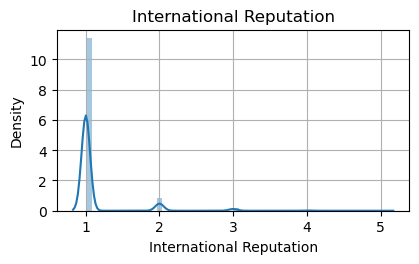

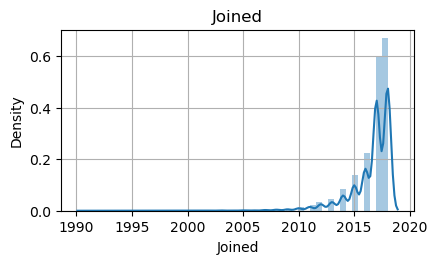

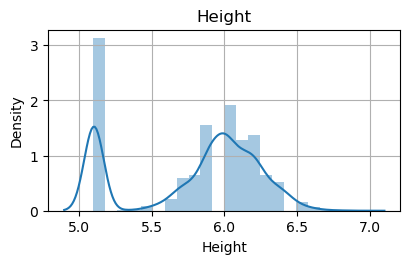

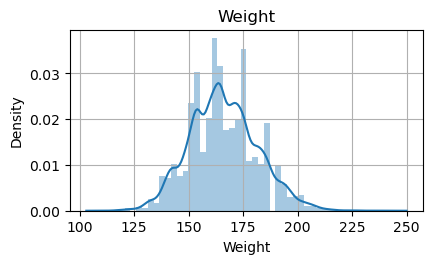

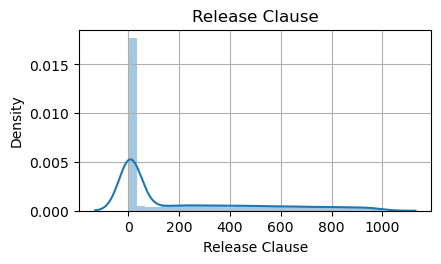

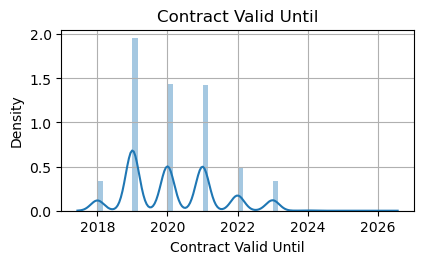

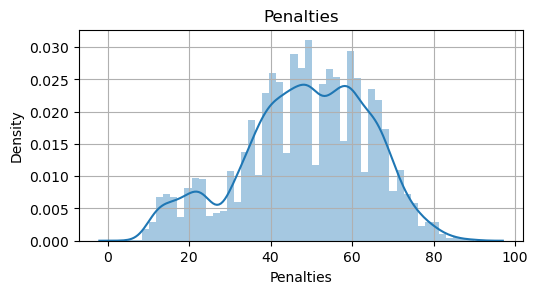

In [65]:
it = 1
for i in imp_col:
    if df[i].dtype in [int,float]:
        plt.figure(figsize=(10,8))
        plt.subplot(3,2,it)         
        sns.distplot(df[i])
        plt.grid()
        plt.title(i)
    
plt.tight_layout()
plt.show()
             

## box plot

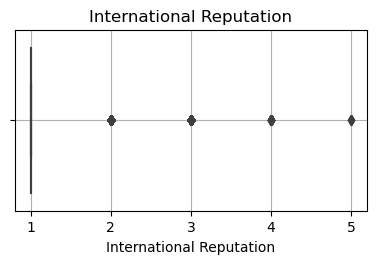

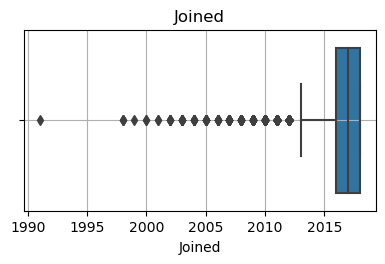

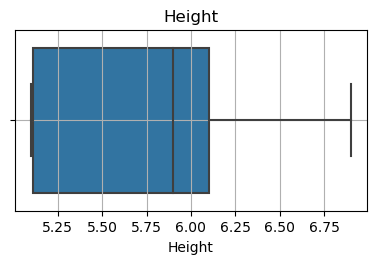

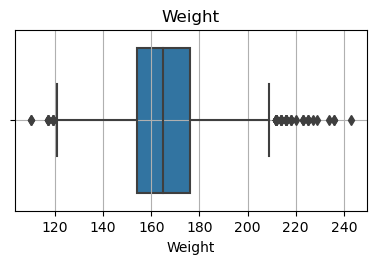

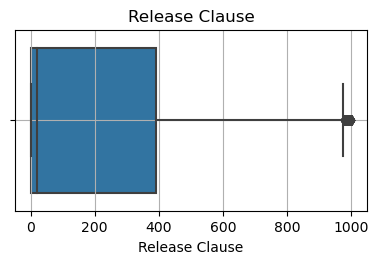

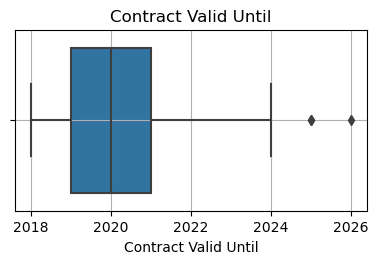

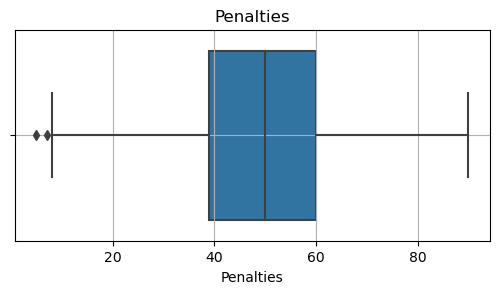

In [66]:
r = 3
c = 2
it = 1
for i in imp_col:
    if df[i].dtype in [int,float]:
        plt.figure(figsize=(10,8))
        plt.subplot(r,c,it)         
        sns.boxplot(df[i])
        plt.grid()
        plt.title(i)
    
plt.tight_layout()
plt.show()
             

In [67]:
df.shape

(13657, 54)

In [68]:
#now we are gonna make imputation on other columns.

num_col = df.select_dtypes(np.number).columns
num_col

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [69]:
cat = df.select_dtypes(include = object).columns
cat

Index(['ID', 'Name', 'Nationality', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Position'],
      dtype='object')

In [70]:
#imputation for otther numerical columns

for i in num_col:
    if i not in imp_col:
        df[i].fillna(df[i].median(),inplace = True)
    

In [71]:
#imputation for other categorical column

for i in cat:
    if i not in imp_col:
        df[i].fillna(df[i].mode()[0],inplace = True)

In [72]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

#### 7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [73]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

Ll = (2.0*iqr)-q1
Ul = (2.0*iqr)+q3

df[((df>Ll) | (df<Ul)).any(axis = 1)]

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220.0,1.0,Right,1.0,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,429.0
1,183465,J. Rodwell,27,England,68,68,925.0,16.0,Right,2.0,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,1.8
2,205186,P. Gazzaniga,26,Argentina,74,78,5.0,46.0,Right,1.0,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,9.6
3,233531,Y. Soteldo,21,Venezuela,71,81,3.8,6.0,Right,1.0,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,6.1
4,243718,R. Koot,18,Netherlands,56,68,120.0,1.0,Right,1.0,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25461,242116,M. Etuin,22,France,62,69,425.0,2.0,Left,1.0,...,61.0,53.0,59.0,58.0,8.0,7.0,11.0,6.0,13.0,829.0
25470,237387,D. Dalling,19,England,54,71,150.0,1.0,Right,1.0,...,57.0,35.0,30.0,42.0,10.0,14.0,9.0,9.0,7.0,379.0
25477,223132,K. Keleş,30,Turkey,68,68,650.0,7.0,Left,1.0,...,58.0,65.0,66.0,65.0,9.0,8.0,16.0,12.0,8.0,1.3
25482,237745,H. Miyazawa,29,Japan,63,63,350.0,1.0,Right,1.0,...,64.0,39.0,43.0,40.0,7.0,15.0,7.0,13.0,8.0,438.0


In [74]:
#there are 13657 records are above  2.0IQR – Q1 and below 2.0IQR + Q3

#### 8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists.

In [75]:
# check for cardinality
for col in cat:
    print(f'{col} cardinality:')
    print(df[col].nunique())

ID cardinality:
13657
Name cardinality:
13053
Nationality cardinality:
160
Preferred Foot cardinality:
2
Work Rate cardinality:
9
Body Type cardinality:
9
Position cardinality:
27


In [76]:
#the nationality has 160 unique values so it could have a cardinality problem

#### 9. Generate pair plots for the following variables: (Overall, Value, Wage, International Reputation, Height, Weight, Release Clause)

In [77]:
col1 = df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]
col1

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,58,220.0,1.0,1.0,6.1,161.0,429.0
1,68,925.0,16.0,2.0,6.2,172.0,1.8
2,74,5.0,46.0,1.0,6.5,198.0,9.6
3,71,3.8,6.0,1.0,5.3,121.0,6.1
4,56,120.0,1.0,1.0,6.1,176.0,198.0
...,...,...,...,...,...,...,...
25461,62,425.0,2.0,1.0,5.9,143.0,829.0
25470,54,150.0,1.0,1.0,5.9,154.0,379.0
25477,68,650.0,7.0,1.0,5.9,148.0,1.3
25482,63,350.0,1.0,1.0,6.0,159.0,438.0


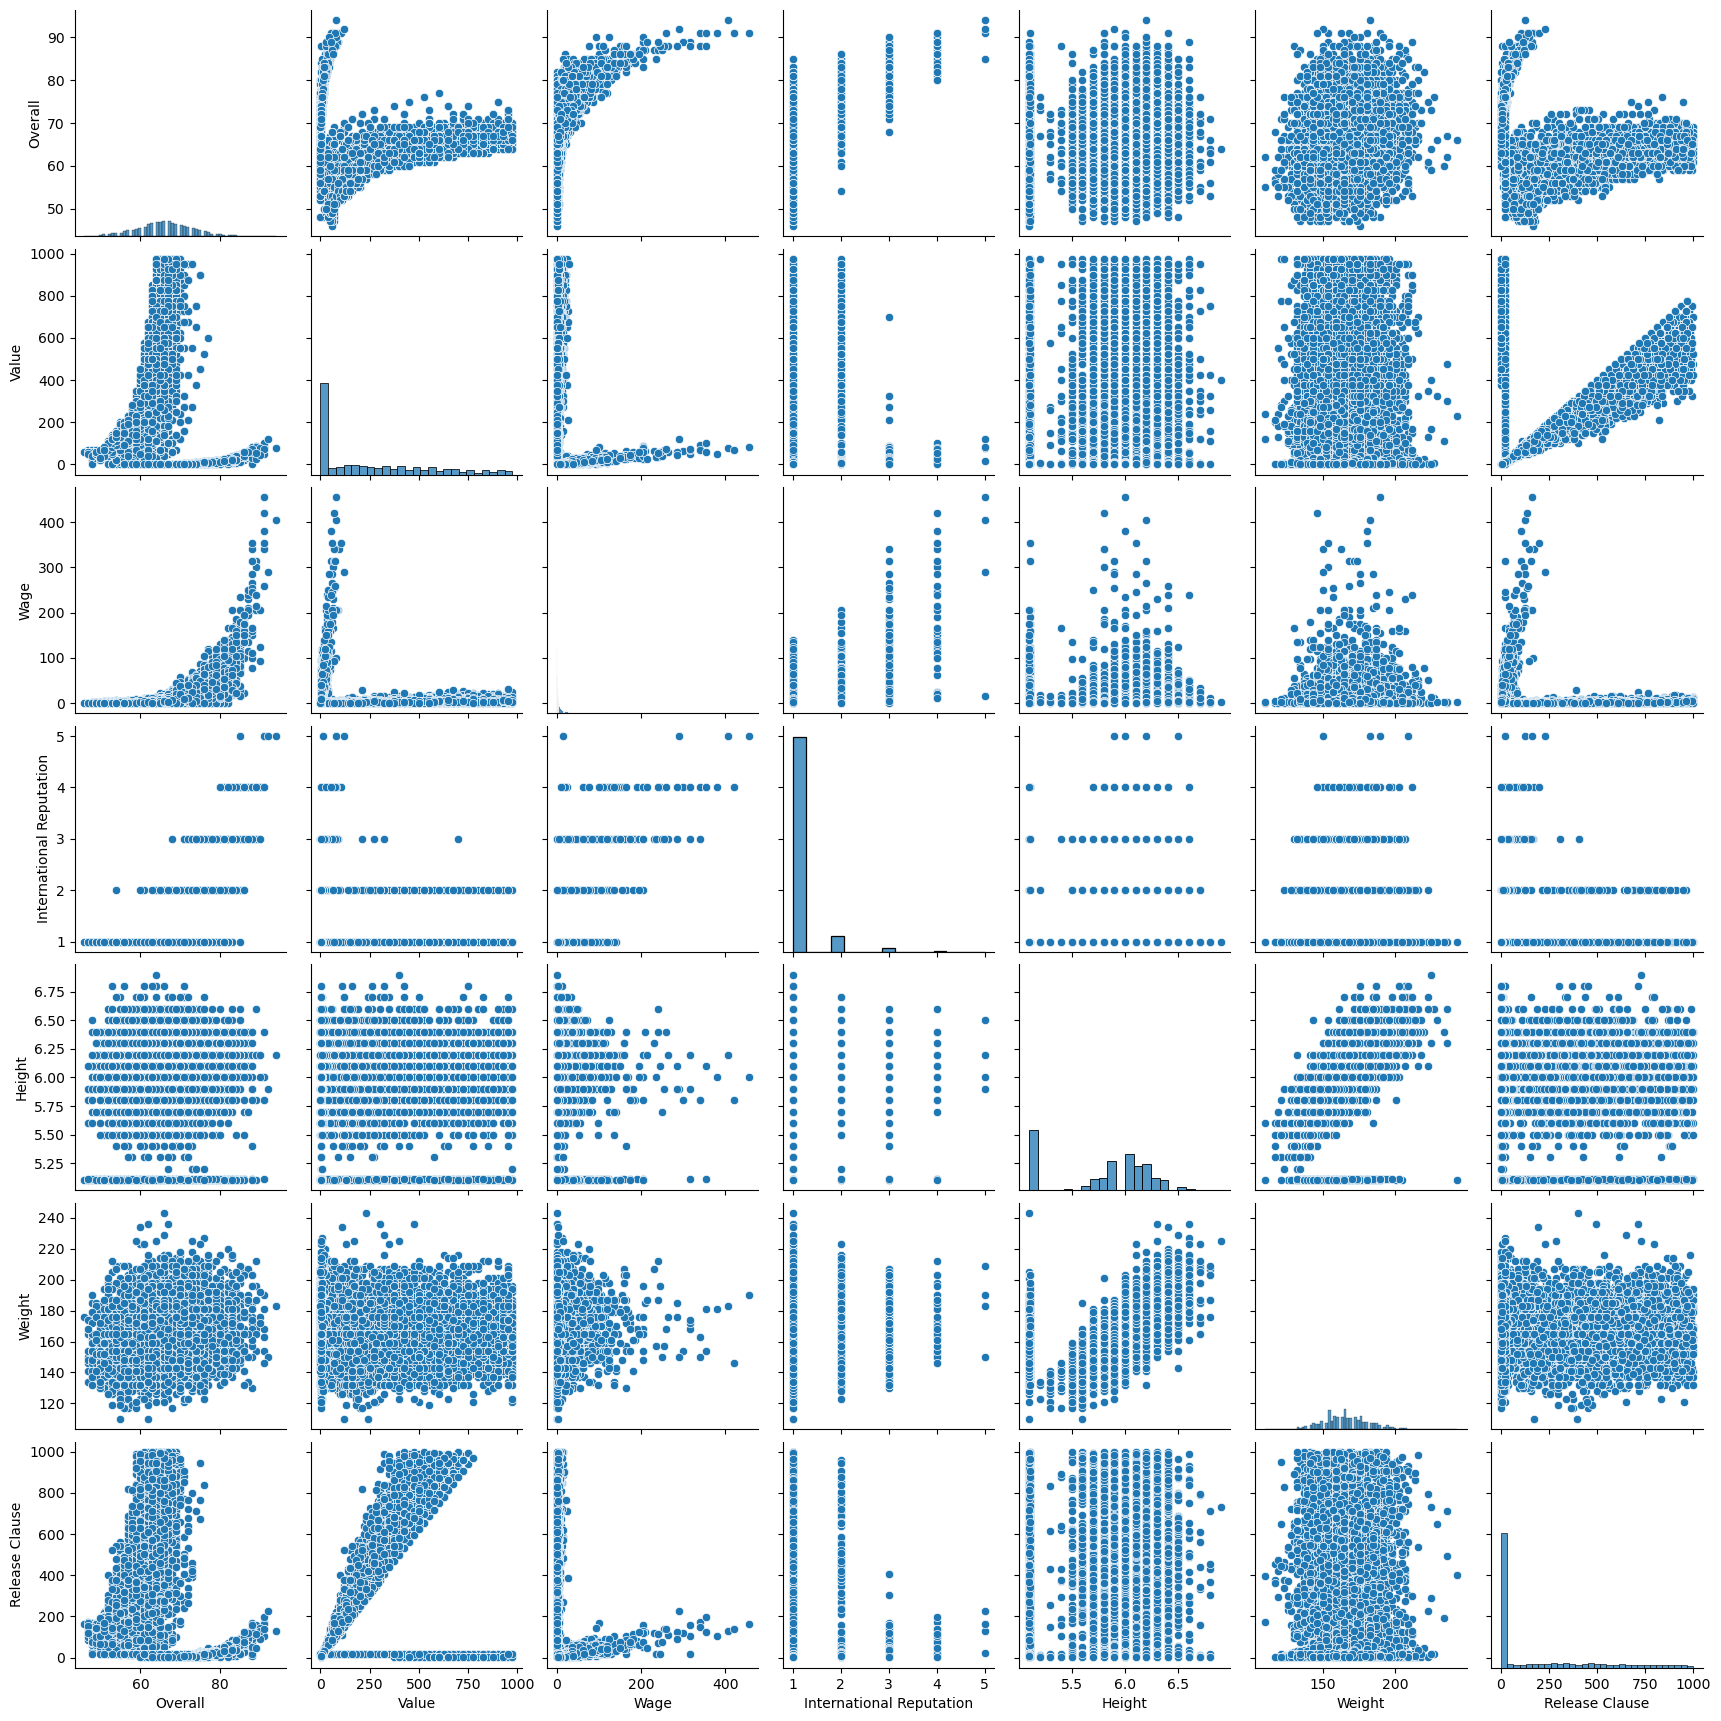

In [78]:
sns.pairplot(col1)
plt.show()

#### 10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.


In [79]:
df_top20 = df[(df['Contract Valid Until']==2020)].sort_values(by = 'Overall',ascending = False).head(20)

In [80]:
df_top20

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15989,155862,Sergio Ramos,32,Spain,91,91,51.0,380.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
963,183277,E. Hazard,27,Belgium,91,91,93.0,340.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
6869,177003,L. Modrić,32,Croatia,91,91,67.0,420.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
20448,193080,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
20440,138956,G. Chiellini,33,Italy,89,89,27.0,215.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6
5874,190460,C. Eriksen,26,Denmark,88,91,73.5,205.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5
13954,164240,Thiago Silva,33,Brazil,88,88,24.0,165.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44.4
13876,193041,K. Navas,31,Costa Rica,87,87,30.5,195.0,Right,3.0,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62.5
9293,175943,D. Mertens,31,Belgium,87,87,45.0,135.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5
8867,189332,Jordi Alba,29,Spain,87,87,38.0,250.0,Left,3.0,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77.9


### 1. What would the average wage for this set of players be?

In [81]:
print('The average wages for this set of players is ',df_top20['Wage'].mean())

The average wages for this set of players is  181.95


### 2. What is the average age?

In [82]:
print('The average age for the players is ',df_top20['Age'].mean())

The average age for the players is  30.5


#### 3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, also explain why this kind of relationship could happen.

In [83]:
df_top20['Overall'].corr(df_top20['Value'])

0.7618920952959497

In [84]:
#yes there is a strong positive correlation between the overall rating and the Value(it stands for current market value)

# because the current market value of an individual player is increasing if the overall rating is increases.

### 11. Generate tables containing the top 5 players by Overall rating for each unique position.

In [85]:
top_5=pd.pivot_table(df,index=['Position','Name'],values=['Overall'])
top_5

Overall
Position Name                 
CAM      A. Adouyev       62.0
         A. Ajagun        69.0
         A. Aktas         54.0
         A. Al Nazera     62.0
         A. Al Nemer      63.0
...                        ...
ST       Zhou Liao        59.0
         Zhu Jianrong     64.0
         Álvaro           72.0
         Ángel            79.0
         Éder             75.0

[13594 rows x 1 columns]

In [130]:
top_5 = top_5.sort_values(by = 'Overall',ascending = False).head(5)
top_5

,,Overall
Position,Name,
ST,Cristiano Ronaldo,94.0
LW,Neymar Jr,92.0
RCB,Sergio Ramos,91.0
LF,E. Hazard,91.0
RCM,K. De Bruyne,91.0


### 1. Are there any players appearing at more than one table? Please point out such players.

In [1]:
# Define tables and players
table1 = {"Alice", "Bob", "Charlie"}
table2 = {"Bob", "David", "Eve"}
table3 = {"Alice", "Frank", "Grace"}

# Create a dictionary to track players and their tables
player_tables = {}

# Iterate through tables and players
for table, players in enumerate([table1, table2, table3], start=1):
    for player in players:
        if player in player_tables:
            player_tables[player].append(table)
        else:
            player_tables[player] = [table]

# Find players appearing at more than one table
for player, tables in player_tables.items():
    if len(tables) > 1:
        print(f"{player} appears at tables {', '.join(map(str, tables))}")


Bob appears at tables 1, 2
Alice appears at tables 1, 3


In [88]:
# the Player E.Hazard comes in two tables.

### 2. What is the average wage one can expect to pay for the top 5 in every position?


In [89]:
df.groupby('Position')['Wage'].apply(lambda x: x.nlargest(5).mean())

Position
CAM    180.0
CB     155.0
CDM    194.6
CF      49.0
CM     150.0
GK     196.0
LAM     82.6
LB     189.0
LCB    166.0
LCM    132.0
LDM    120.8
LF     123.2
LM     157.0
LS     121.4
LW     261.0
LWB     36.6
RAM     48.4
RB     153.0
RCB    219.0
RCM    222.8
RDM    105.6
RF      41.8
RM     152.0
RS     154.6
RW     181.0
RWB     46.4
ST     299.0
Name: Wage, dtype: float64

# STATS

### 1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05 Before checking the test, Kindly make sure data is normally distributed.

In [90]:
df['Preferred Foot'].value_counts()

Right    10483
Left      3174
Name: Preferred Foot, dtype: int64

In [91]:
df_r = df[(df['Preferred Foot']=='Right')]['Overall']
df_l = df[(df['Preferred Foot']=='Left')]['Overall']

In [92]:
#step1 :
#H0 : mu1-mu2 <= 0        #mu1 stands for df_1 (left foot player)
#H1 : mu1 -mu2 > 0        #mu2 stands for df_2 (right foot player)


In [93]:
# step2:
stats.shapiro(df['Overall'])

ShapiroResult(statistic=0.9966169595718384, pvalue=3.6861401483016806e-17)

In [94]:
#since the p_value is less than the alpha so the data is not normal so we go for mannwhitneyu test.

In [95]:
#step3
#test_statistic
alpha = 0.05
stat,p_value = stats.mannwhitneyu(x = df_l,y = df_r,alternative = 'greater')
print('The P_value is ',p_value)

The P_value is  8.985563171719411e-07


In [96]:
#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We Reject the Null Hypothesis H0'

Therefore left footed players overall rating is higher than the right footed player overall rating

### 2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05


In [98]:
df_a1 = df[(df['Age']>=35)]['Potential']
df_a2 = df[(df['Age']<35)]['Potential']

n1 = len(df_a1)                 #df_a1 players potential greater than 35
n2 = len(df_a2)                 #df_a2 stands fro players potentail less than 35

print('No of players potential greater than eqaul to age 35',n1)
print('No of players potential less than age 35',n2)

No of players potential greater than eqaul to age 35 346
No of players potential less than age 35 13311


In [99]:
##step1 :
#H0 : mu1-mu2 >= 0       
#H1 : mu1 -mu2 < 0

In [100]:
## step 2
#checking for normality
stats.shapiro(df['Potential'])

ShapiroResult(statistic=0.9933071136474609, pvalue=1.190773703517539e-24)

In [101]:
#p_value is lesseer than the alpha  so the data is not nornal

In [102]:
alpha = 0.05
stat,p_value = stats.mannwhitneyu(x = df_a1,y = df_a2,alternative = 'less')
print('The P_value is ',p_value)

The P_value is  1.115069496276631e-20


In [103]:
#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We Reject the Null Hypothesis H0'

Therefore, players who are greater than 35, their potential will be lesser than those whose age is less than 35

### 3. Use the statistical test to check the relationship between the Preferred Foot and Position  with the 99% confident interval.

In [105]:
a = pd.crosstab(df['Preferred Foot'],df['Position'])
a

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,202,253,99,11,195,159,7,863,198,75,...,10,26,30,19,3,189,29,74,2,210
Right,540,1074,622,43,874,1372,7,115,286,216,...,963,452,269,164,9,650,137,200,63,1412


In [106]:
#step1 :
#H0 : There is no relation between preferred foot and postion
#H1 : There is a relation between preferred foot and position

In [107]:
#step2 :
#performing chi-square test.
chi2, p, dof, expected = stats.chi2_contingency(a)

In [133]:
#step3
alpha = 0.01
critical_value = stats.chi2.ppf(1-alpha, dof)

# Print the results
print("Chi-squared test statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Critical value:", critical_value)

Chi-squared test statistic: 3394.5278485109557
P-value: 0.0
Degrees of freedom: 26
Expected frequencies: [[ 172.44695028  308.40579922  167.56637622   12.55004759  248.44446072
   355.81709014    3.25371604  227.29530644  112.48561177   67.63081204
    43.92516658    3.02130775  190.8072051    36.02328476   65.07432086
    13.94449733    3.95094091  226.13326499  111.09116204   69.49007835
    42.53071685    2.78889947  194.99055429   38.57977594   63.67987113
    15.10653877  376.96624442]
 [ 569.55304972 1018.59420078  553.43362378   41.44995241  820.55553928
  1175.18290986   10.74628396  750.70469356  371.51438823  223.36918796
   145.07483342    9.97869225  630.1927949   118.97671524  214.92567914
    46.05550267   13.04905909  746.86673501  366.90883796  229.50992165
   140.46928315    9.21110053  644.00944571  127.42022406  210.32012887
    49.89346123 1245.03375558]]
Critical value: 45.64168266628317


In [109]:
# step4:
if chi2 > critical_value:
    print("Reject the null hypothesis, there is a significant relationship between Preferred Foot and Position")
else:
    print("Fail to reject the null hypothesis, there is no significant relationship between Preferred Foot and Position")
    

Reject the null hypothesis, there is a significant relationship between Preferred Foot and Position


### 4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

In [110]:
df['International Reputation'].value_counts()

1.0    12464
2.0      928
3.0      224
4.0       37
5.0        4
Name: International Reputation, dtype: int64

In [111]:
#step 1
stats.shapiro(df['Wage'])               #p_value is greater less than alpha the data is not normal

ShapiroResult(statistic=0.38748836517333984, pvalue=0.0)

In [112]:
#step2 
#H0 : there is a significant effect on players Wage cause by Ineternational Reputation
#H1 : there is no significant effect on players Wage cause by Ineternational Reputation

In [113]:
a= df[(df['International Reputation']==1.0)]['Wage']
b= df[(df['International Reputation']==2.0)]['Wage']
c= df[(df['International Reputation']==3.0)]['Wage']
d= df[(df['International Reputation']==4.0)]['Wage']
e= df[(df['International Reputation']==5.0)]['Wage']

In [114]:
#step3 
#test statistic

alpha = 0.04
stat,p_value = stats.f_oneway(a,b,c,d,e)
print('The test_statistic is',stat)
print('The p_value is',p_value)

The test_statistic is 3485.1081736616075
The p_value is 0.0


In [134]:

#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We fail to Reject the Null Hypothesis H0'

Therefore "there is a significant effect on players Wage cause by Ineternational Reputation"

### 5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically.

In [117]:
#step1
#H0 mu <= 25000
#H1 mu>25000

alpha = 0.05
mu = 25000
n = len(df_top20['Wage'])

In [118]:
#step2 :
#checking the normality of the data 

stats.shapiro(df_top20['Wage'])

ShapiroResult(statistic=0.9450737833976746, pvalue=0.29842087626457214)

In [119]:
#the p_value is greater than the alpha so the data is normal.

In [120]:
#step 3:
stat,p_value = stats.ttest_1samp(a = df_top20['Wage'],popmean = 25000,alternative = 'greater')
print('The test_statistic is ',stat)
print('The p_value is ',p_value)

The test_statistic is  -1037.3394335814062
The p_value is  1.0


In [121]:
#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We fail to Reject the Null Hypothesis H0'